In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>  Collecting Data</h3>

In [2]:
car_data =pd.read_csv('car data.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<h3>Exploratory Data Analysis (EDA)

<h3> Understanding Data

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<h3>Visualizing data

<h4>UNIVARIATE ANALYSIS

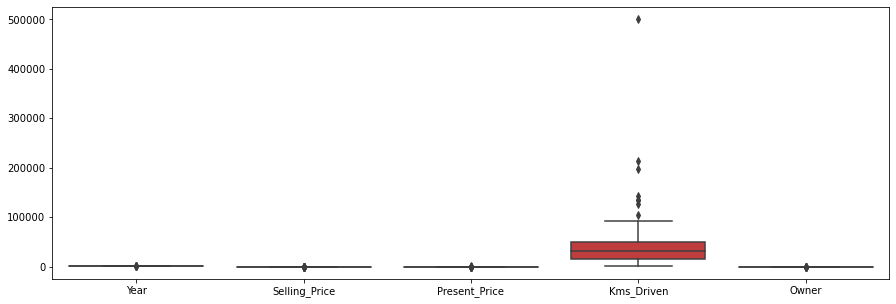

In [6]:
plt.figure(figsize = (15,5))
sns.boxplot(data=car_data)
plt.show()

In [7]:
# from the boxplot we can see that kms_Driven has outliers
q1 =car_data['Kms_Driven'].quantile(0.25)
q3 =car_data['Kms_Driven'].quantile(0.75)
iqr = q3-q1     # Inter-Quartile range

# By IQR Rule
UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

33767.0 99417.5 -35650.5


In [8]:
car_data[car_data['Kms_Driven']>UL]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [9]:
car_data[car_data['Kms_Driven']>UL].count()['Kms_Driven']        #These  values are greater than the upper limit value 99417.5

8

In [10]:
#outlier removal from Kms_Driven 
car_data = car_data[car_data['Kms_Driven']<UL] 
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


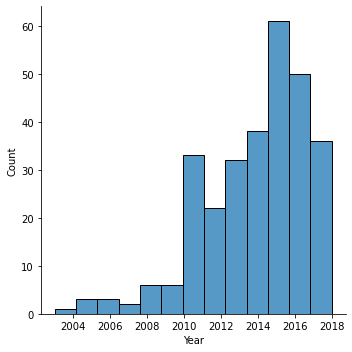

In [11]:
sns.displot(car_data['Year']);

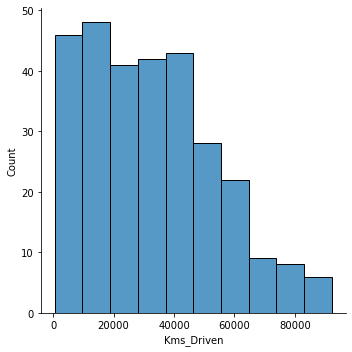

In [12]:
sns.displot(car_data['Kms_Driven']);

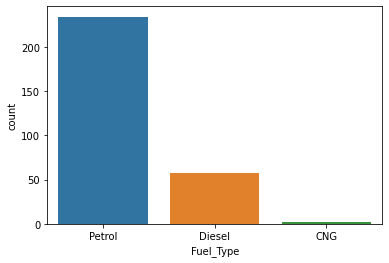

In [13]:
sns.countplot(x=car_data['Fuel_Type']) ;

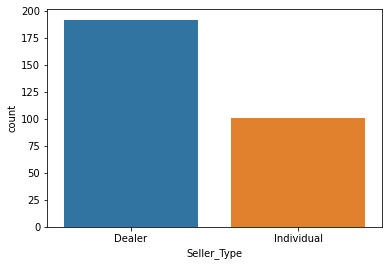

In [14]:
sns.countplot(x=car_data['Seller_Type']) ;

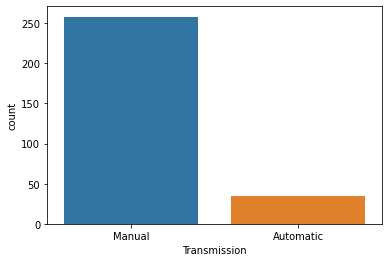

In [15]:
sns.countplot(x=car_data['Transmission']) ;

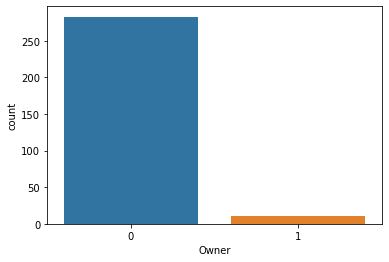

In [16]:
sns.countplot(x=car_data['Owner']) ;

<h4>Bivarate  analysis

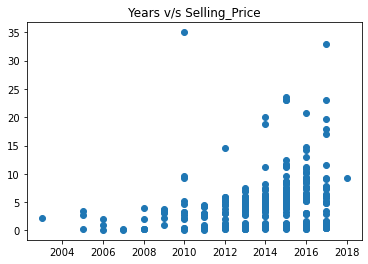

In [17]:
plt.scatter(x=car_data['Year'],y= car_data['Selling_Price'])
plt.title('Years v/s Selling_Price')
plt.show()

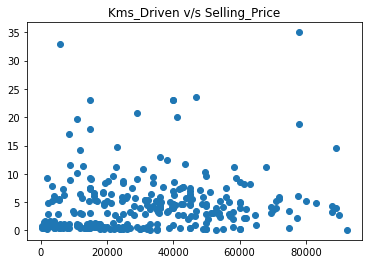

In [18]:
plt.scatter(x=car_data.Kms_Driven,y= car_data.Selling_Price)
plt.title('Kms_Driven v/s Selling_Price')
plt.show()

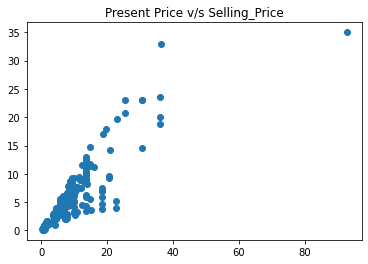

In [19]:
plt.scatter(x=car_data.Present_Price,y= car_data.Selling_Price)
plt.title('Present Price v/s Selling_Price')
plt.show()

<h3>cleaning Data

In [20]:
car_data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'etios gd', 'land cruiser',
       'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200',
       'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390',
       'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsa

In [21]:
car_data.drop(['Car_Name'],axis=1,inplace=True)

C:\Users\GTB Student\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<h3>Converting categorical variables to dummy variables

In [22]:
car_data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [23]:
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [24]:
car_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
car_data['Owner'].unique()

array([0, 1], dtype=int64)

In [26]:
car_data=pd.get_dummies(car_data,drop_first=True)

In [27]:
car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


<h3>making training and testing data sets

In [28]:

features = car_data.drop(['Selling_Price'],axis=1)
labels = car_data['Selling_Price']

In [29]:
features

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1
297,2015,5.90,60000,0,0,1,0,1
298,2009,11.00,87934,0,0,1,0,1
299,2017,12.50,9000,0,1,0,0,1


In [30]:
labels

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 293, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split 
features_train , features_test , labels_train , labels_test = train_test_split(features,labels,test_size = 0.30) 

In [32]:
print("Traning Features = ",features_train.shape) 
print("Traning Labels    = ",labels_train.shape) 
print("Testing Features = ",features_test.shape) 
print("Testing Labels    = ",labels_test.shape) 

Traning Features =  (205, 8)
Traning Labels    =  (205,)
Testing Features =  (88, 8)
Testing Labels    =  (88,)


<h3>Choosing a Model And Training Model

In [33]:
#Building model using sklearn(Gradient Descent) 
from sklearn.linear_model import LinearRegression 
carPricePredictor= LinearRegression() 

In [34]:
carPricePredictor.fit(features_train,labels_train) # training the algorithm

LinearRegression()

<h3>Evaluating the Model

In [35]:
# Getting the coefficients and intercept 
print('coefficients:\n', carPricePredictor.coef_)
print('\n intercept:', carPricePredictor.intercept_) 

coefficients:
 [ 2.64801254e-01  4.42994760e-01 -3.69256042e-05  3.61650226e-01
  2.68344074e+00  3.00396841e-01 -1.36953747e+00 -1.20130859e+00]

 intercept: -529.9465863142981


In [36]:
carPricePredictor.score(features_test,labels_test)

0.8987626936354371

In [37]:
#Now predicting on the test data 
labels_pred = carPricePredictor.predict(features_test)
labels

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 293, dtype: float64

In [38]:
labels_pred.shape

(88,)

In [39]:
labels_test

102    1.65
162    0.45
73     2.65
60     6.95
165    0.45
       ... 
38     3.00
44     1.25
251    5.00
257    8.50
32     4.95
Name: Selling_Price, Length: 88, dtype: float64

In [40]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(labels_test,labels_pred))

MSE: 1.9201273367108278


<h3>Making Predictions

In [41]:
features.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [42]:
 def Predict_Price():
        year = int(input("Enter Year in which the was bought : "))
        presentPrice = float(input("Enter the current ex-showroom price(in Lakhs) of the car : "))
        Kms_Driven  = float(input("Enter the distance completed by the car in km: " ))
        Owner = int(input("Enter number of owners the car previously had : "))
        if Owner>=2:
                Owner=3
        Fuel_Type = input("Enter Fuel type of the car i.e diesel,petrol,cng : ")
        if Fuel_Type=="diesel":
            Fuel_Diesel = 1
            Fuel_Petrol = 0
        elif Fuel_Type=="petrol":
            Fuel_Diesel = 0
            Fuel_Petrol = 1
        else:
            Fuel_Diesel = 0
            Fuel_Petrol = 0
            
        Seller_Type = input("Enter Seller Type i.e. dealer or individual : ")
        if Seller_Type=="dealer":
            Seller_Individual=0
        else: 
            Seller_Individual=1
        Transmission = input("Enter Car Type i.e. manual or automatic : ")
        if Transmission == 'manual':
            Transmission_Manual=1
        else:
            Transmission_Manual=0  
        price = float(carPricePredictor.predict([[year, presentPrice,Kms_Driven,Owner,Fuel_Diesel,Fuel_Petrol,Seller_Individual,Transmission_Manual] ]))
        if price >0:
            print("price - ",price)
            price = round(price,2)
            print("You can sell your car at ₹",price," Lakh")
            print("\n \U0001F642 ")
        else:
            print("Its Time to sell car at junkyard")
            print("\n\U0001F610")
        

In [43]:
Predict_Price()

Enter Year in which the was bought : 2015
Enter the current ex-showroom price(in Lakhs) of the car : 5
Enter the distance completed by the car in km: 30000
Enter number of owners the car previously had : 0
Enter Fuel type of the car i.e diesel,petrol,cng : diesel
Enter Seller Type i.e. dealer or individual : dealer
Enter Car Type i.e. manual or automatic : manual
price -  6.217278349672142
You can sell your car at ₹ 6.22  Lakh

 🙂 


In [44]:
price = float(carPricePredictor.predict([[2015, 5,30000,0,1,0,1,1] ]))
print("price - ",price)
if price >0:
    price = round(price,2)
    print("You can sell your car at ₹",price," Lakh")
    print("\n \U0001F642 ")
else:
    print("Its Time to sell car at junkyard")
    print("\n\U0001F610")

price -  4.847740877410729
You can sell your car at ₹ 4.85  Lakh

 🙂 


In [45]:
price = carPricePredictor.predict([[2020, 5,6000000,0,0,1,0,0] ])
print("price - ",price)
if price >0: 
    price = round(price,2)
    print("You can sell your car at ₹",price," Lakh")
    print("\n \U0001F642 ")
else:
    print("Its Time to sell car at junkyard")
    print("\n\U0001F610")

price -  [-214.08630765]
Its Time to sell car at junkyard

😐


In [46]:
from joblib import dump, load
dump(carPricePredictor, 'car_predictor_model') 

['car_predictor_model']